# Inspect the quality of the OpenPose Data.
#### The raw OpenPose data is required to execute the script.

In [ ]:
# Imports and keypoint arrays
import seaborn as sns
import numpy as np
from scipy.stats import norm
from utils_dir.qual_utils import *

body_kps = ["Nose", "Neck", "RShoulder", "RElbow", "RWrist", "LShoulder", "LElbow", "LWrist", 
        "MidHip", "RHip", "RKnee", "RAnkle", "LHip", "LKnee", "LAnkle", "REye", "LEye", 
        "REar", "LEar", "LBigToe", "LSmallToe", "LHeel", "RBigToe", "RSmallToe", "RHeel"]

face_kps = [
    "rightTemple", "rightHighCheek", "rightMiddleCheek", "rightLowerCheek", "rightUpperJaw", 
    "rightMiddleJaw", "rightLowerJaw", "rightChin", "chin", "leftChin", "leftLowerJaw", 
    "leftMiddleJaw", "leftUpperJaw", "leftLowerCheek", "leftMiddleCheek", "leftHighCheek", 
    "leftTemple", "rightOuterEyeBrow", "rightOuter1EyeBrow", "rightPeakEyeBrow", 
    "rightInner1EyeBrow", "rightInnerEyeBrow", "leftInnerEyeBrow", "leftInner1EyeBrow", 
    "leftPeakEyeBrow", "leftOuter1EyeBrow", "leftOuterEyeBrow", "noseTop", "noseBridge", 
    "noseBelowBridge", "noseBottom", "leftNostril", "leftInNostril", "centerNostril", 
    "rightInNostril", "rightNostril", "leftEdgeEyeLeft", "leftTopEyeOuter", "leftTopEyeInner", 
    "leftEdgeEyeRight", "leftLowerEyeRight", "leftLowerEyeLeft", "rightEdgeEyeLeft", 
    "rightTopEyeInner", "rightTopEyeOuter", "rightEdgeEyeRight", "rightLowerEyeRight", 
    "rightLowerEyeLeft", "rightOuterLip", "rightUpperLip", "rightTopLip", "topCenterLip", 
    "leftTopLip", "leftUpperLip", "leftOuterLip", "leftLowerLip", "leftBottomLip", 
    "bottomCenterLip", "rightBottomLip", "rightLowerLip", "rightInnerLip", "rightInnerTopLip", 
    "innerTopCenterLip", "leftInnerTopLip", "leftInnerLip", "leftInnerBottomLip", 
    "innerBottomCenterLip", "rightInnerBottomLip", "leftPupil", "rightPupil"
]

all_kps = body_kps + face_kps

In [ ]:
pose_dir = "...."# Specify raw pose directory

# Create dataframe of conf values and NaN.
df = get_conf_df(pose_dir = pose_dir, 
                 cols=all_kps, 
                 get_na = True, 
                 na_thresh = .3, 
                 meta_data='metaData_coding.csv')

Processing files: 100%|██████████| 402/402 [03:09<00:00,  2.12it/s]


In [3]:
# Print Summary statistics.

numeric_cols = df.select_dtypes(include='number').columns
summary = df.groupby('person')[numeric_cols].mean().reset_index()
print(summary.round(3))


  person  Nose_confidence_max_na  Nose_confidence_sum_na  \
0     p1                  10.109                  17.562   
1     p2                  28.172                  63.960   

   Nose_confidence_min_na  Nose_confidence_perc_na  Nose_confidence_mean  \
0                   3.308                    0.176                 0.876   
1                   5.841                    0.652                 0.869   

   Nose_confidence_median  Nose_confidence_std  Nose_confidence_max  \
0                   0.878                0.044                0.961   
1                   0.875                0.053                0.964   

   Nose_confidence_min  ...  leftPupil_confidence_min  \
0                0.463  ...                     0.011   
1                0.409  ...                     0.007   

   rightPupil_confidence_max_na  rightPupil_confidence_sum_na  \
0                       157.682                      1250.197   
1                       231.998                      1626.975   

   right

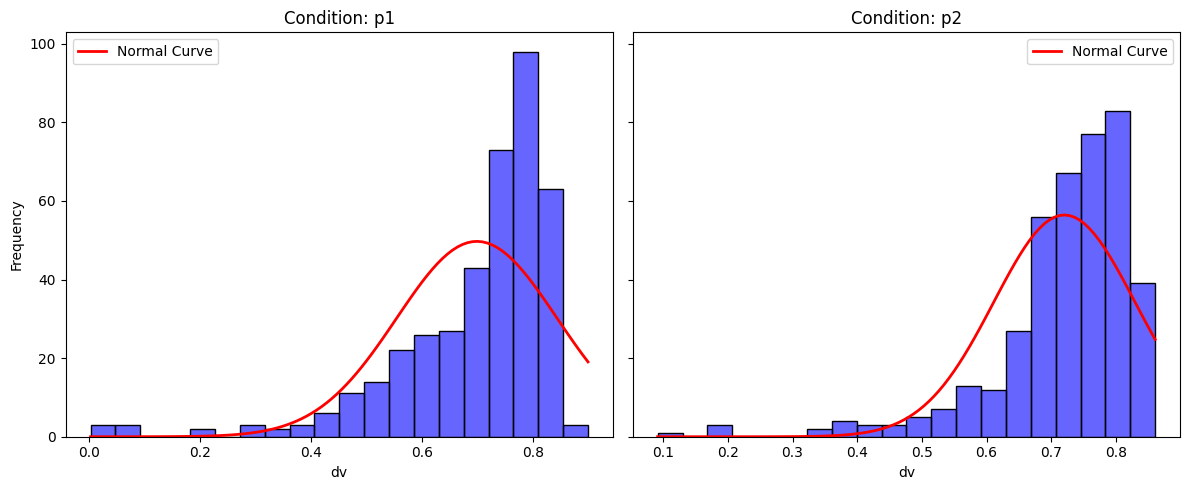

In [4]:
# Plot histograms of confidence values

dv = 'LWrist_confidence_mean' # Define the keypoint to plot. 

fig, axes = plt.subplots(1, len(df['person'].unique()), figsize=(12, 5), sharey=True)

for ax, (condition, subset) in zip(axes, df.groupby('person')):
    sns.histplot(subset[dv], bins=20, kde=False, ax=ax, color='blue', edgecolor='black', alpha=0.6)

    mean, std = subset[dv].mean(), subset[dv].std()
    x = np.linspace(subset[dv].min(), subset[dv].max(), 100)
    y = norm.pdf(x, mean, std) * len(subset[dv]) * (subset[dv].max() - subset[dv].min()) / 20
    ax.plot(x, y, 'r-', lw=2, label='Normal Curve')
    
    ax.set_title(f'Condition: {condition}')
    ax.set_xlabel('dv')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()


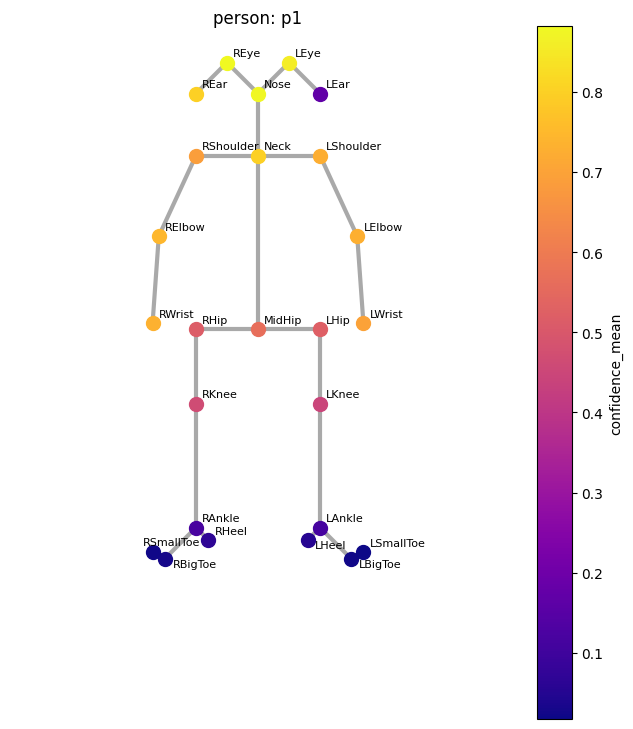

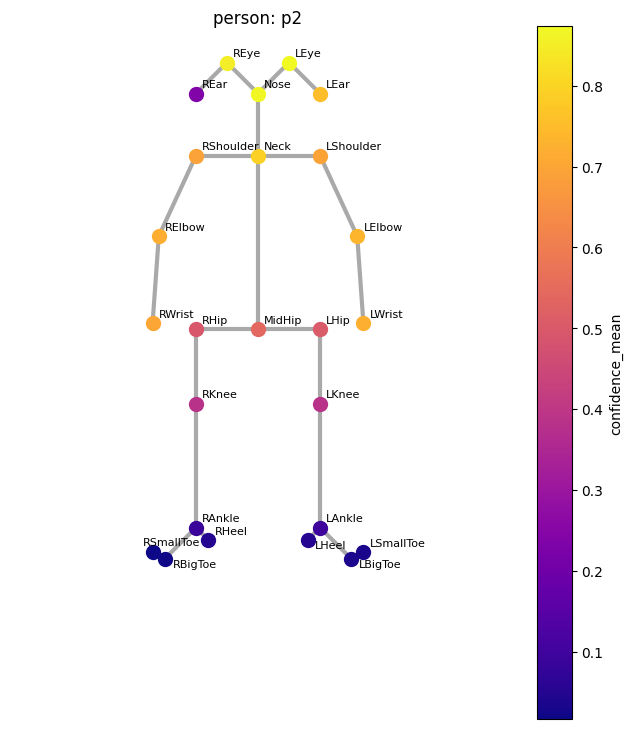

In [5]:
# Plot average values per body keypoint

plot_body_kps(df=df, group='person', measure='confidence_mean')

<Figure size 1400x600 with 0 Axes>

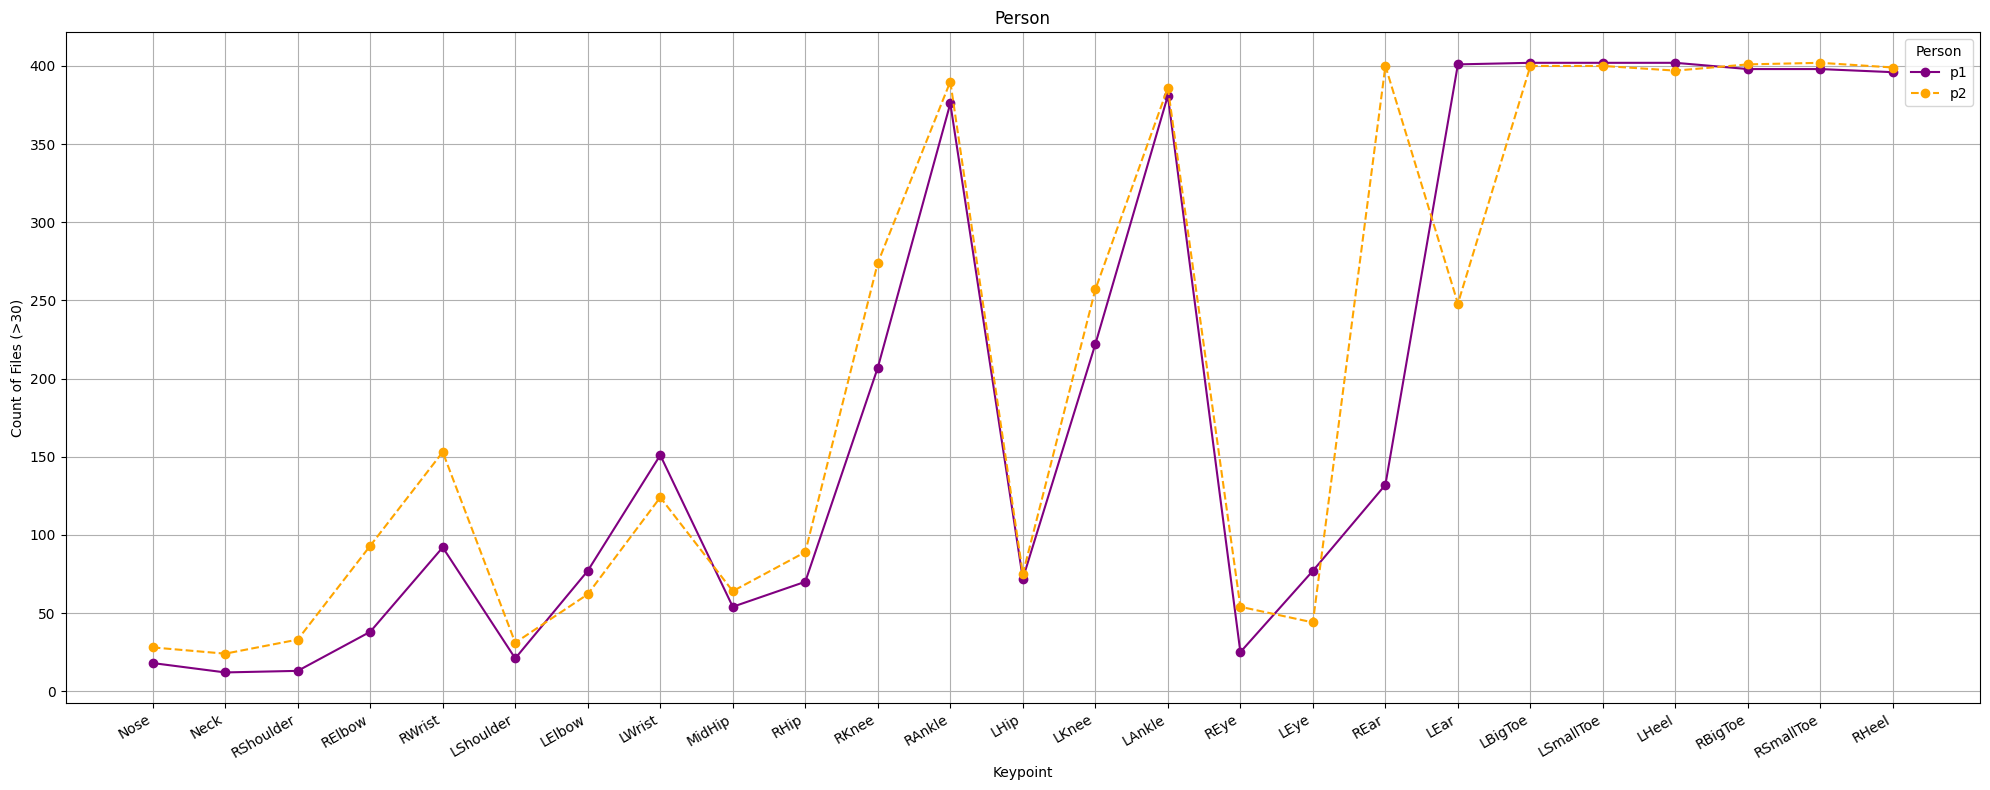

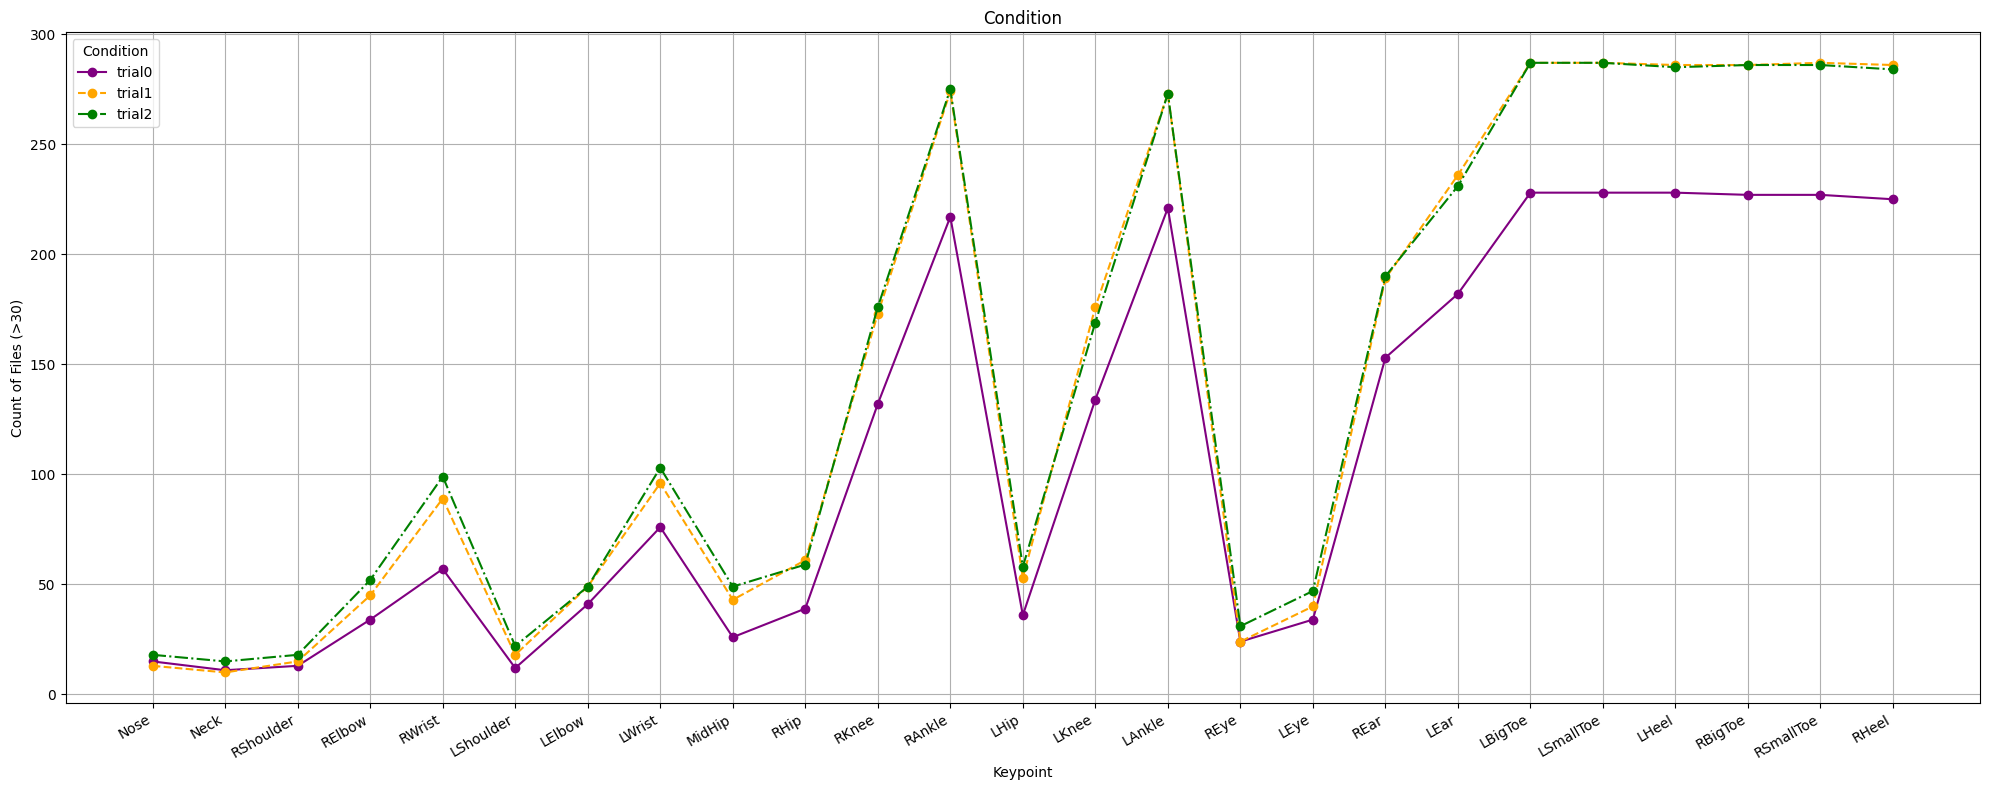

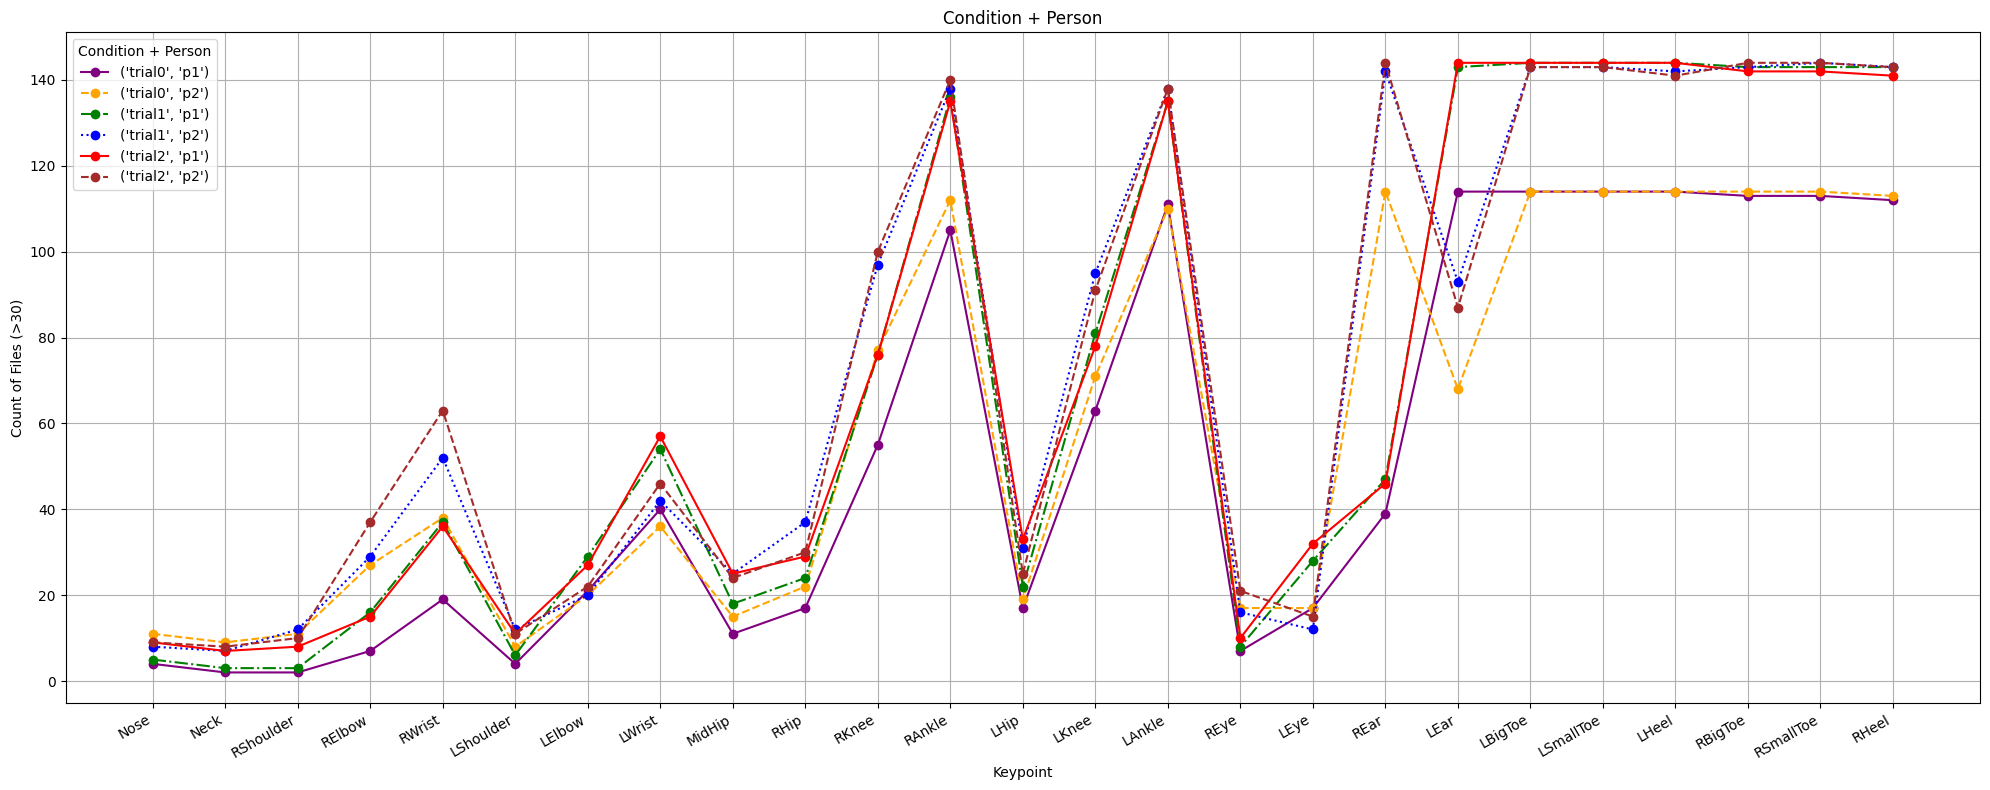

In [ ]:
plot_missing_kps(df=df, kps=body_kps, threshold=50, figsize=(20, 8))

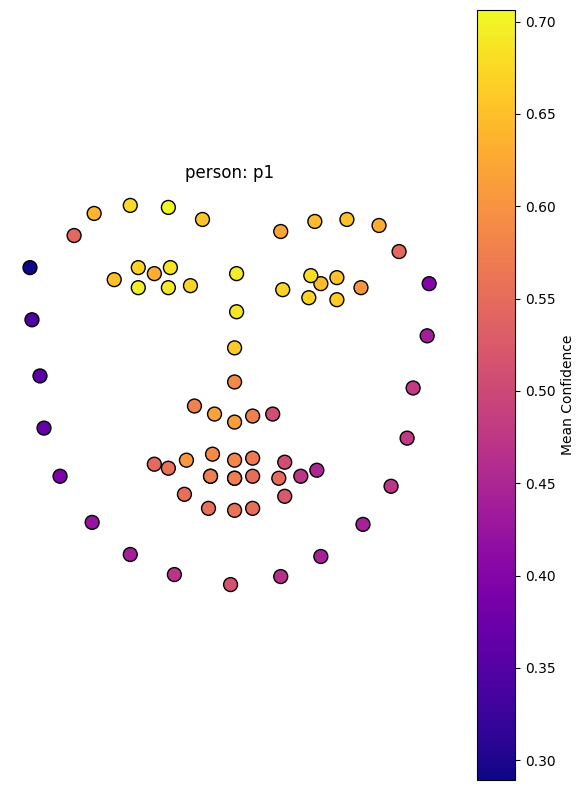

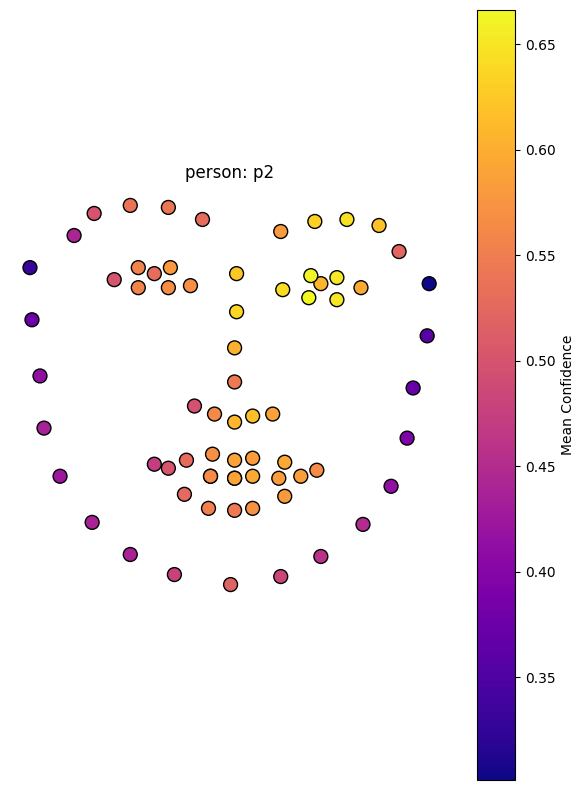

In [ ]:
# Plot average values per face keypoint

plot_face_kps(df=df, group='person', measure='confidence_mean')

# Get Info regarding missing keypoints per window 

In [ ]:
from utils_dir.qual_utils import *

directory = "...." # Specify raw pose directory

body_kps = ["Nose", "Neck", "RShoulder", "RElbow", "RWrist", "LShoulder", "LElbow", "LWrist",
            "MidHip", "RHip", "RKnee", "RAnkle", "LHip", "LKnee", "LAnkle", "REye", "LEye", 
            "REar", "LEar", "LBigToe", "LSmallToe", "LHeel", "RBigToe", "RSmallToe", "RHeel"]

res = get_missing_win(pose_dir=directory, 
                 cols=body_kps, 
                 conf_threshold = .30, 
                 interpolate_max=25, 
                 window_size_sec=60, 
                 fps=25, 
                 overlap=True, 
                 meta_data='metaData_coding.csv')

Processing files: 100%|██████████| 805/805 [02:07<00:00,  6.30it/s]


Condition: trial0


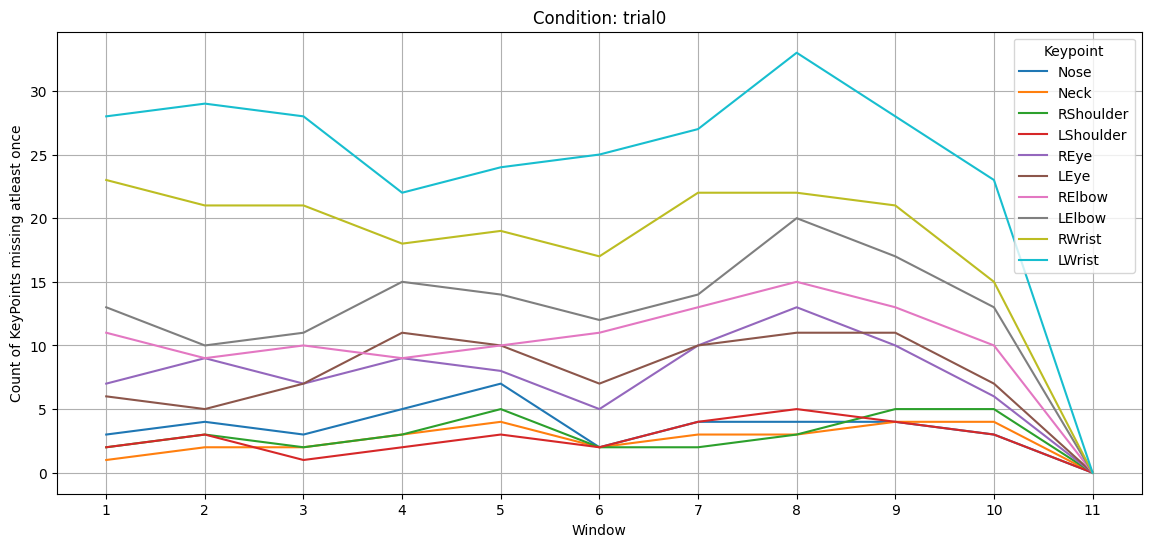

Condition: trial1


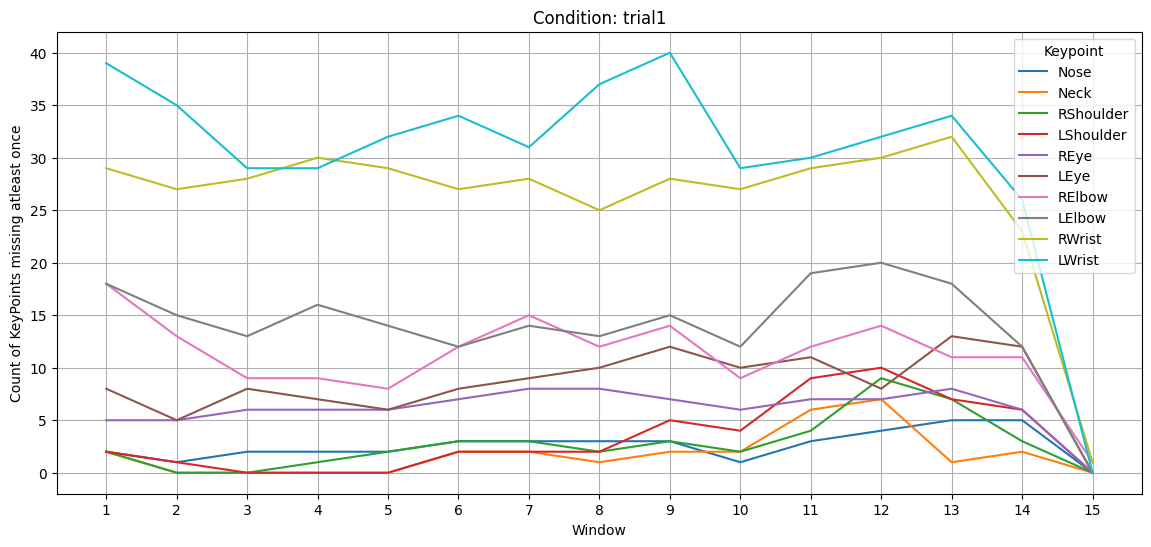

Condition: trial2


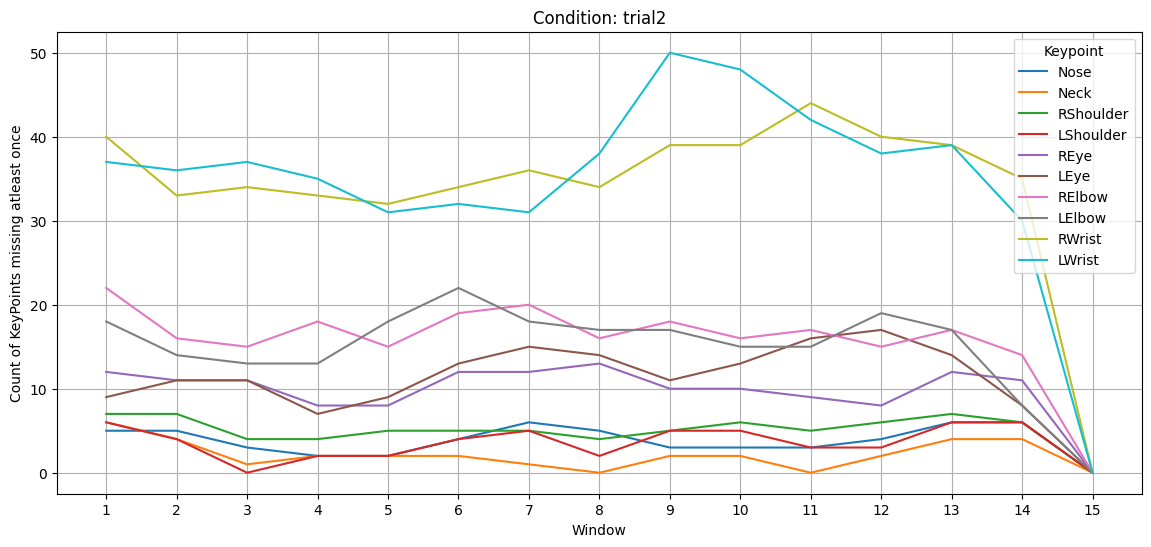

In [8]:
kps = ["Nose", "Neck", "RShoulder", "LShoulder","REye", "LEye", "RElbow", "LElbow", "RWrist", "LWrist"]

plt_kps_missing(res, kps=kps)